In [3]:
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

# Load the dataset to understand its structure
data_path = 'NYPD_Shooting_Incident_Data__Historic__20240410.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info about the dataset
data_head = data.head()
data_info = data.info()
data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

(   INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
 0     228798151  05/27/2021   21:30:00  QUEENS               NaN       105   
 1     137471050  06/27/2014   17:40:00   BRONX               NaN        40   
 2     147998800  11/21/2015   03:56:00  QUEENS               NaN       108   
 3     146837977  10/09/2015   18:30:00   BRONX               NaN        44   
 4      58921844  02/19/2009   22:58:00   BRONX               NaN        47   
 
    JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
 0                0.0                NaN           NaN   
 1                0.0                NaN           NaN   
 2                0.0                NaN           NaN   
 3                0.0                NaN           NaN   
 4                0.0                NaN           NaN   
 
    STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
 0                    False  ...      NaN       NaN         18-24       M   
 1                  

In [4]:
# Calculate the number of missing (null) values in each column
missing_values = data.isnull().sum()
missing_values


INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [5]:
# Dropping rows where JURISDICTION_CODE, Latitude, Longitude, or Lon_Lat have missing values
cleaned_data = data.dropna(subset=['JURISDICTION_CODE', 'Latitude', 'Longitude', 'Lon_Lat'])

# Check the number of remaining missing values in these columns to confirm the operation
remaining_missing = cleaned_data.isnull().sum()
remaining_missing


INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25594
PRECINCT                       0
JURISDICTION_CODE              0
LOC_CLASSFCTN_DESC         25594
LOCATION_DESC              14976
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
Lon_Lat                        0
dtype: int64

/var/folders/x3/5rg2fq097snf05l9glzskh9r0000gn/T/ipykernel_34770/2290321543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['OCCUR_DATE'] = pd.to_datetime(cleaned_data['OCCUR_DATE'])
/var/folders/x3/5rg2fq097snf05l9glzskh9r0000gn/T/ipykernel_34770/2290321543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['YEAR'] = cleaned_data['OCCUR_DATE'].dt.year


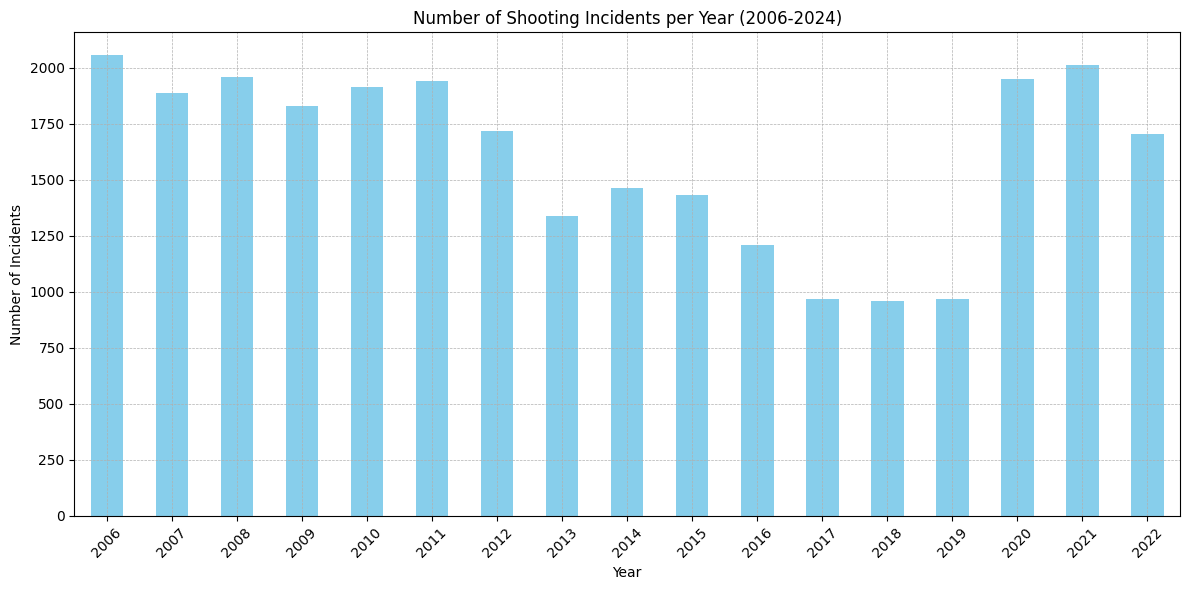

In [6]:
import matplotlib.pyplot as plt

# Convert the 'OCCUR_DATE' to datetime format and extract the year
cleaned_data['OCCUR_DATE'] = pd.to_datetime(cleaned_data['OCCUR_DATE'])
cleaned_data['YEAR'] = cleaned_data['OCCUR_DATE'].dt.year

# Group data by year and count incidents
incidents_per_year = cleaned_data['YEAR'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents per Year (2006-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\giann\AppData\Local\Temp\ipykernel_16440\1706195655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['OCCUR_TIME'] = pd.to_datetime(cleaned_data['OCCUR_TIME'], format='%H:%M:%S').dt.hour


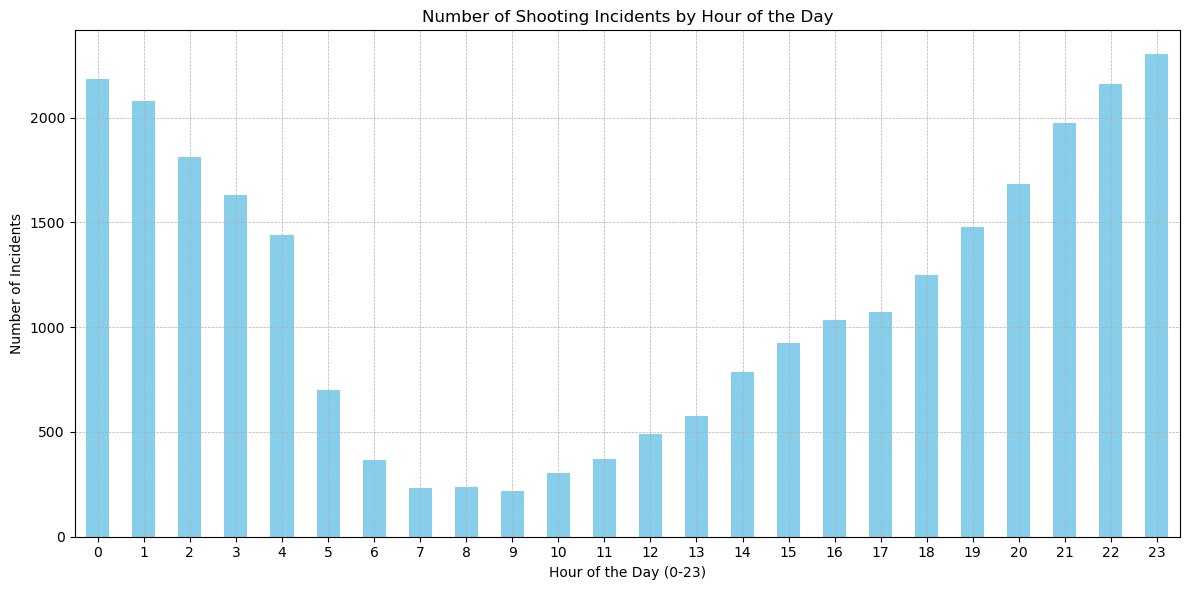

In [5]:
# Convert the 'OCCUR_TIME' to datetime format and extract the hour
cleaned_data['OCCUR_TIME'] = pd.to_datetime(cleaned_data['OCCUR_TIME'], format='%H:%M:%S').dt.hour

# Group data by hour and count incidents
incidents_per_hour = cleaned_data['OCCUR_TIME'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)  # Keeping the labels horizontal for clarity
plt.tight_layout()
plt.show()

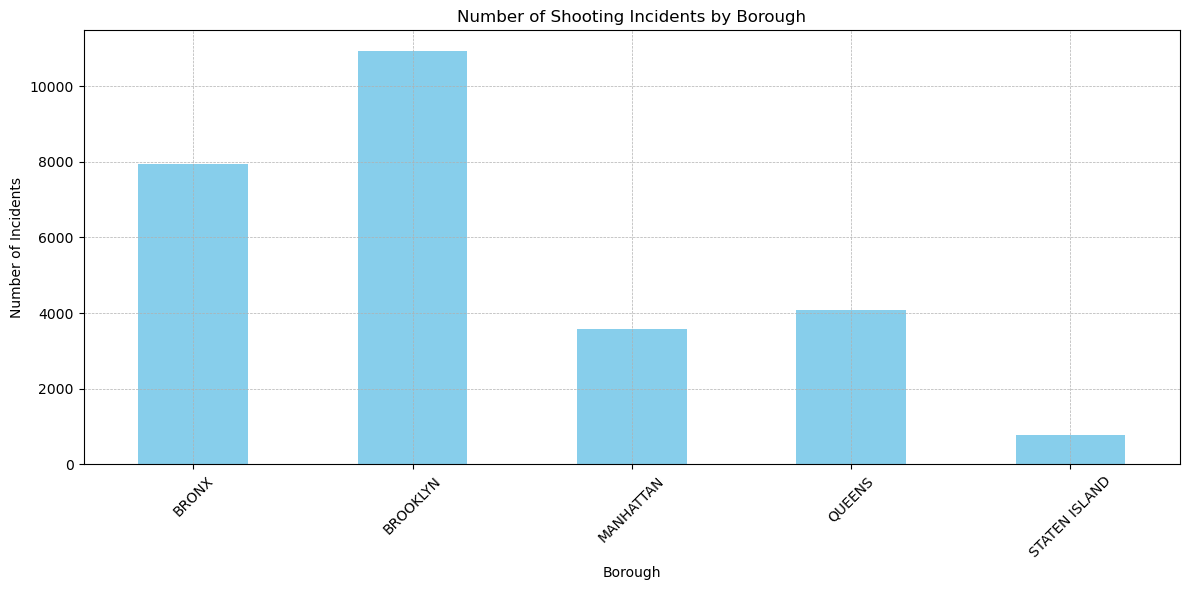

In [6]:
# Counting incidents per borough (BORO)
incidents_per_boro = cleaned_data['BORO'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_boro.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)  # Rotating for better label visibility
plt.tight_layout()
plt.show()

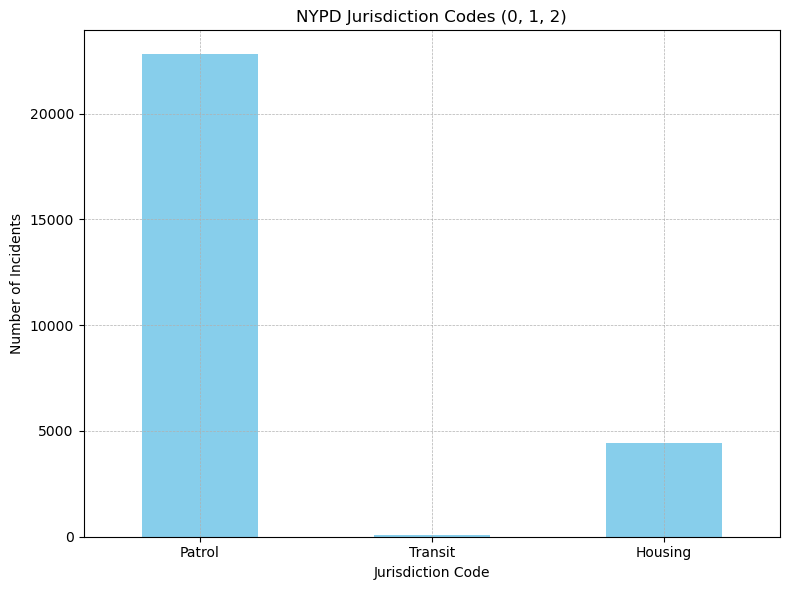

In [7]:
# Filtering data based on the jurisdiction codes and counting incidents for each
jurisdiction_counts = cleaned_data['JURISDICTION_CODE'].value_counts().sort_index()

nypd_jurisdiction = jurisdiction_counts.loc[[0, 1, 2]]

# Plotting
plt.figure(figsize=(8, 6))
nypd_jurisdiction.plot(kind='bar', color='skyblue')
plt.title('NYPD Jurisdiction Codes (0, 1, 2)')
plt.xlabel('Jurisdiction Code')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=[0, 1, 2], labels=['Patrol', 'Transit', 'Housing'], rotation=0)
plt.tight_layout()
plt.show()


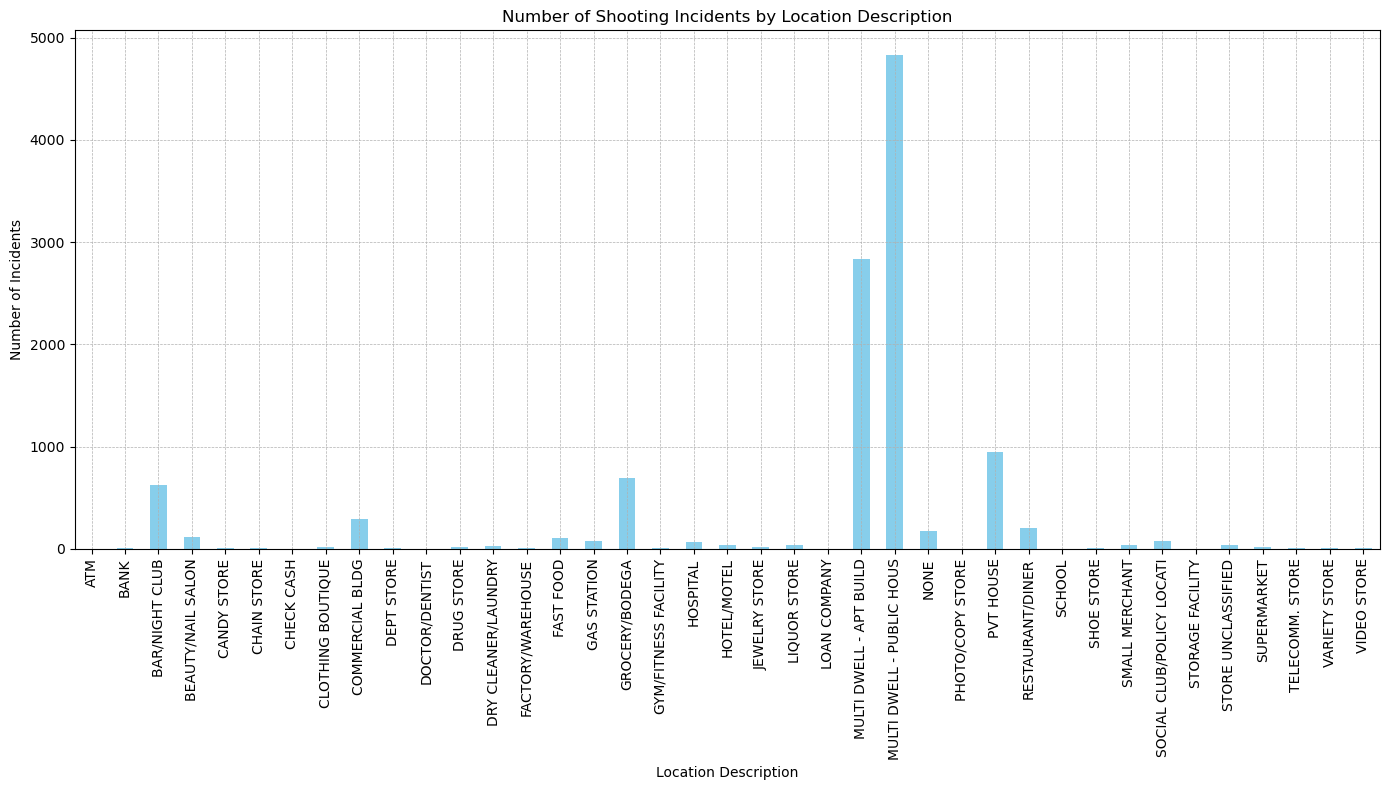

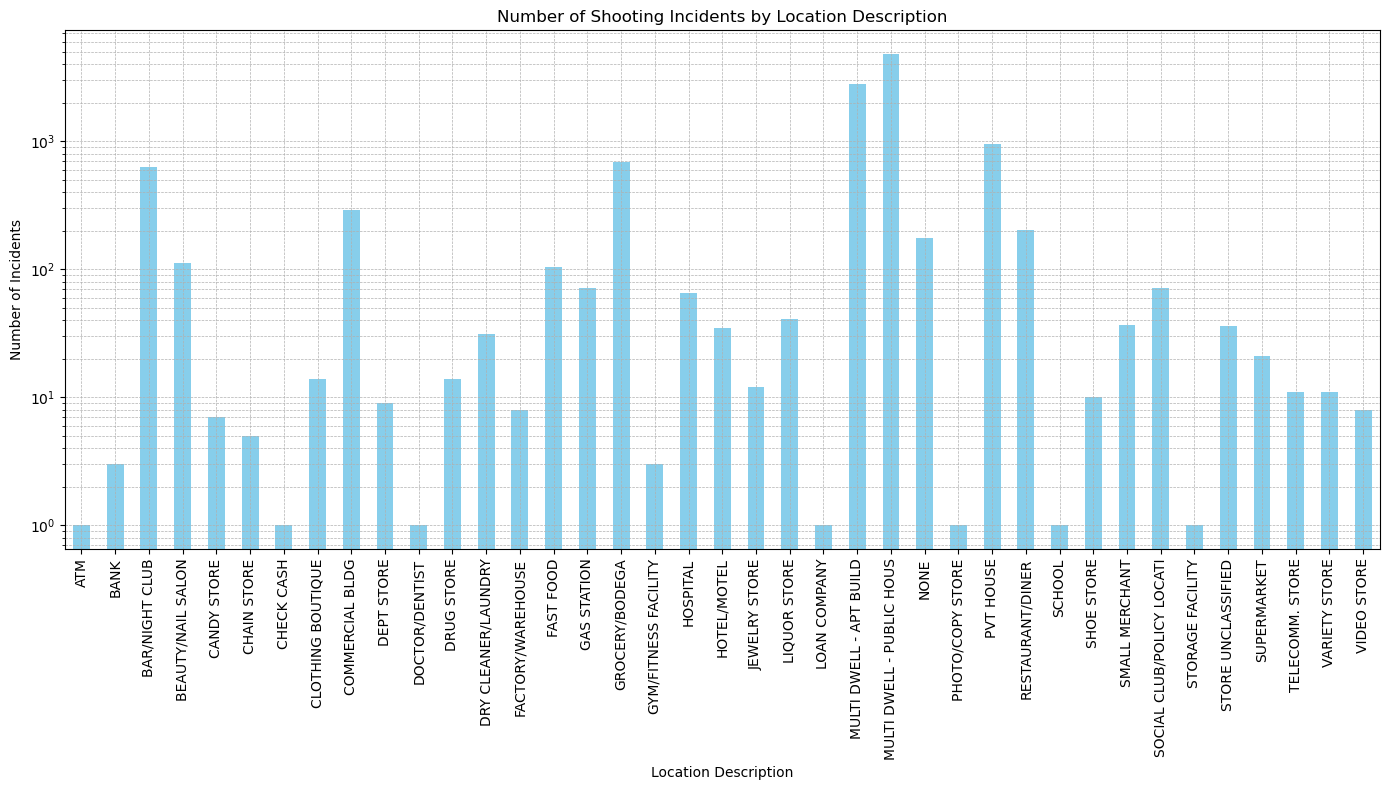

In [8]:
cleaned_data = cleaned_data[cleaned_data['LOCATION_DESC'] != '(null)']
filtered_location_desc = cleaned_data['LOCATION_DESC'].dropna()
incidents_per_location_desc = filtered_location_desc.value_counts().sort_index()

plt.figure(figsize=(14, 8))
incidents_per_location_desc.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)  # Rotating the labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
incidents_per_location_desc.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.yscale('log')  # Applying a logarithmic scale
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

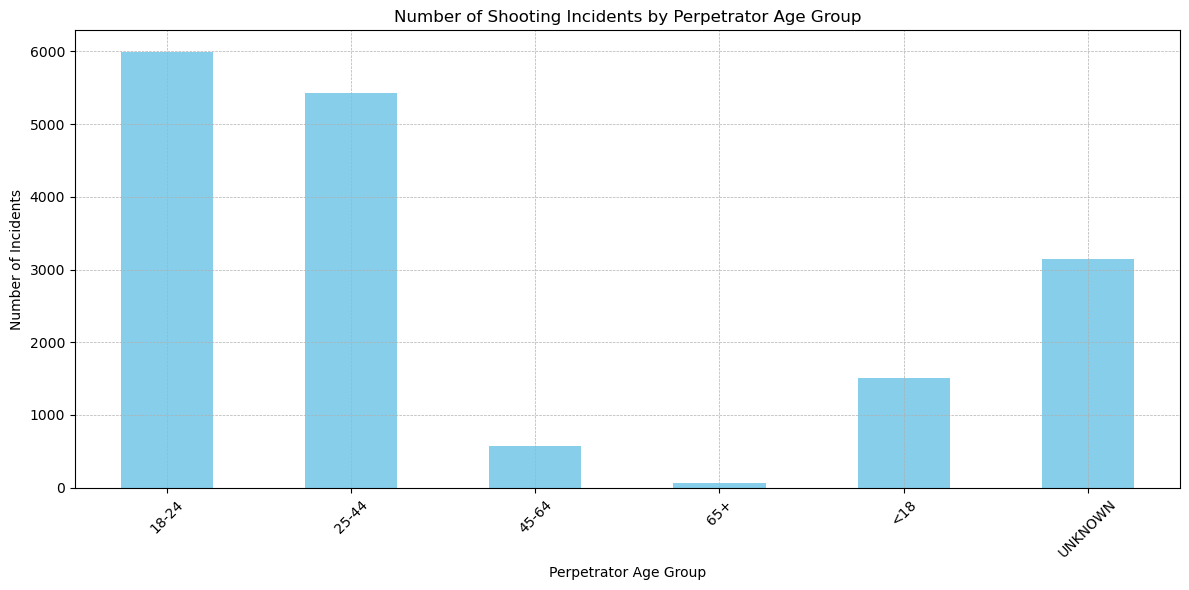

In [9]:
# List of unrealistic age groups to remove
unrealistic_ages = ['1020', '224', '940', '(null)']
# Filter out rows containing any of these unrealistic age groups
cleaned_data = cleaned_data[~cleaned_data['PERP_AGE_GROUP'].isin(unrealistic_ages)]
filtered_perp_age_group = cleaned_data['PERP_AGE_GROUP'].dropna()

# Proceed with your analysis or plotting

incidents_per_perp_age_group = filtered_perp_age_group.value_counts().sort_index()

plt.figure(figsize=(12, 6))
incidents_per_perp_age_group.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Perpetrator Age Group')
plt.xlabel('Perpetrator Age Group')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)  # Rotating the labels for better readability
plt.tight_layout()
plt.show()

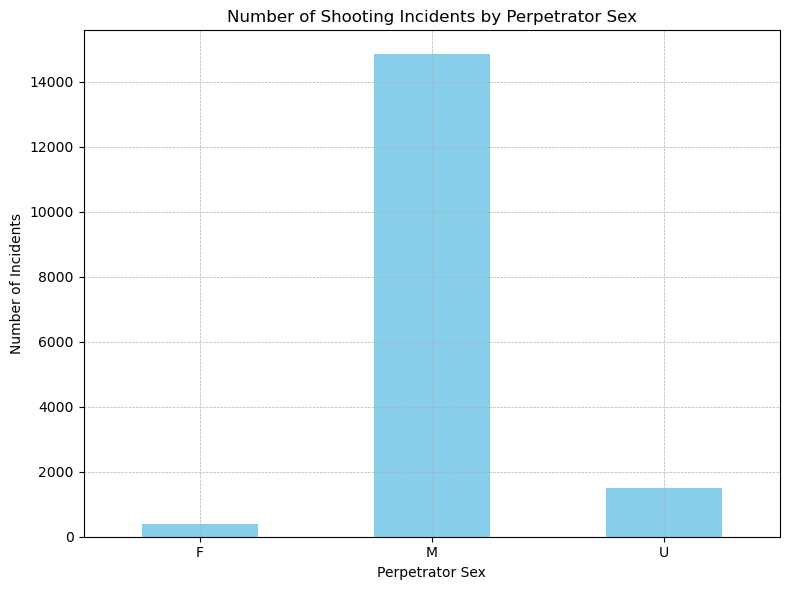

In [10]:
# Assuming the column name is confirmed to be 'PERP_SEX'
cleaned_data = cleaned_data[cleaned_data['PERP_SEX'] != '(null)']
incidents_per_perp_sex = cleaned_data['PERP_SEX'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
incidents_per_perp_sex.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Perpetrator Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


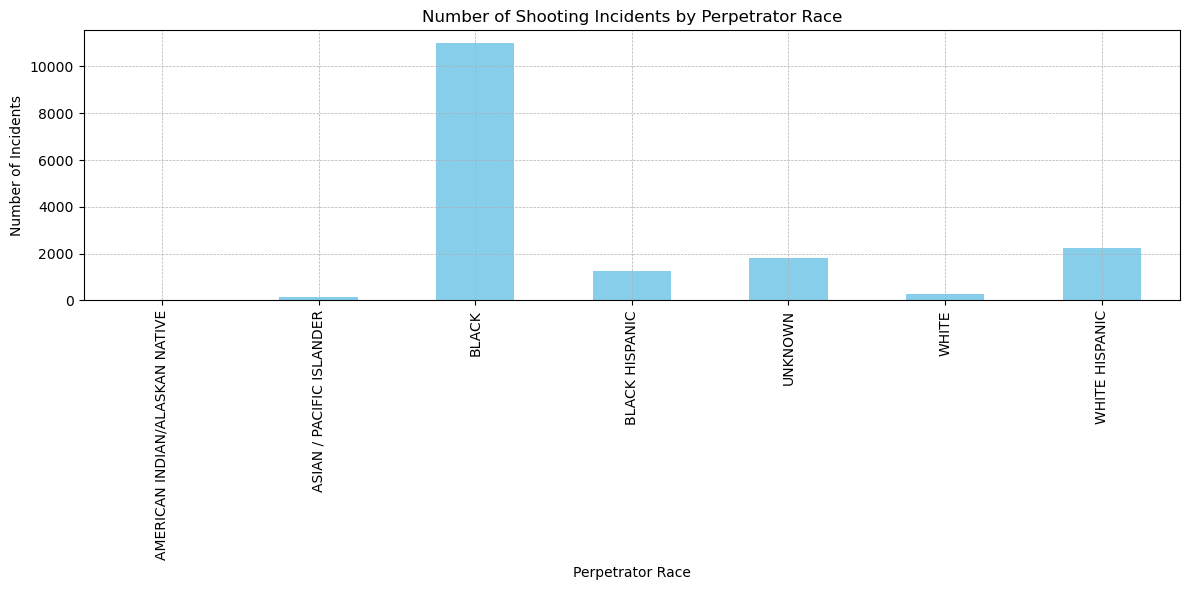

In [11]:
incidents_per_perp_race = cleaned_data['PERP_RACE'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_perp_race.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Perpetrator Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

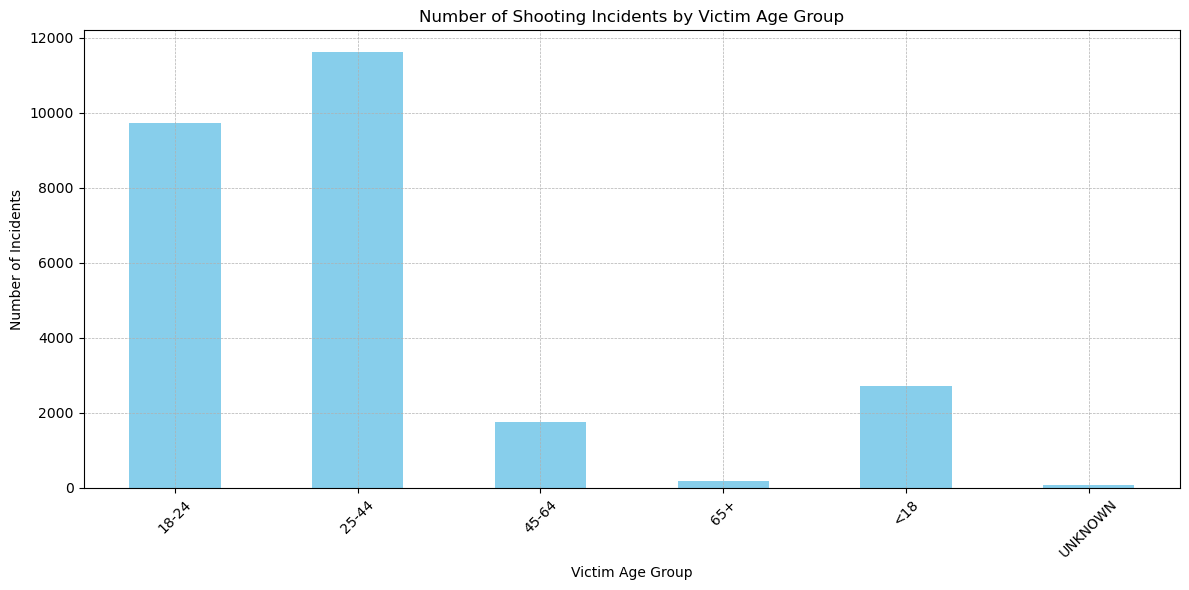

In [12]:
cleaned_data = cleaned_data[cleaned_data['VIC_AGE_GROUP'] != '1022']
incidents_per_vic_age_group = cleaned_data['VIC_AGE_GROUP'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_vic_age_group.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Victim Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

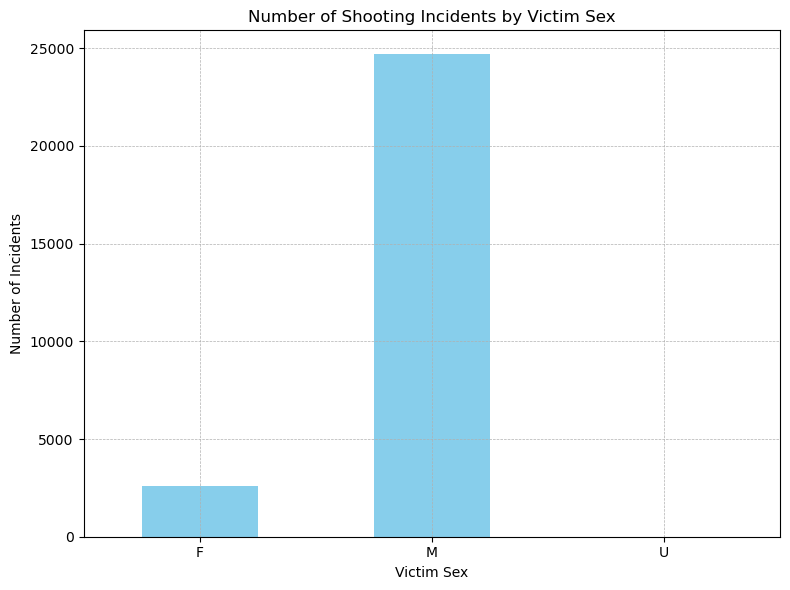

In [13]:
incidents_per_vic_sex = data['VIC_SEX'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(8, 6))
incidents_per_vic_sex.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)  # Keeping the labels horizontal for clarity
plt.tight_layout()
plt.show()

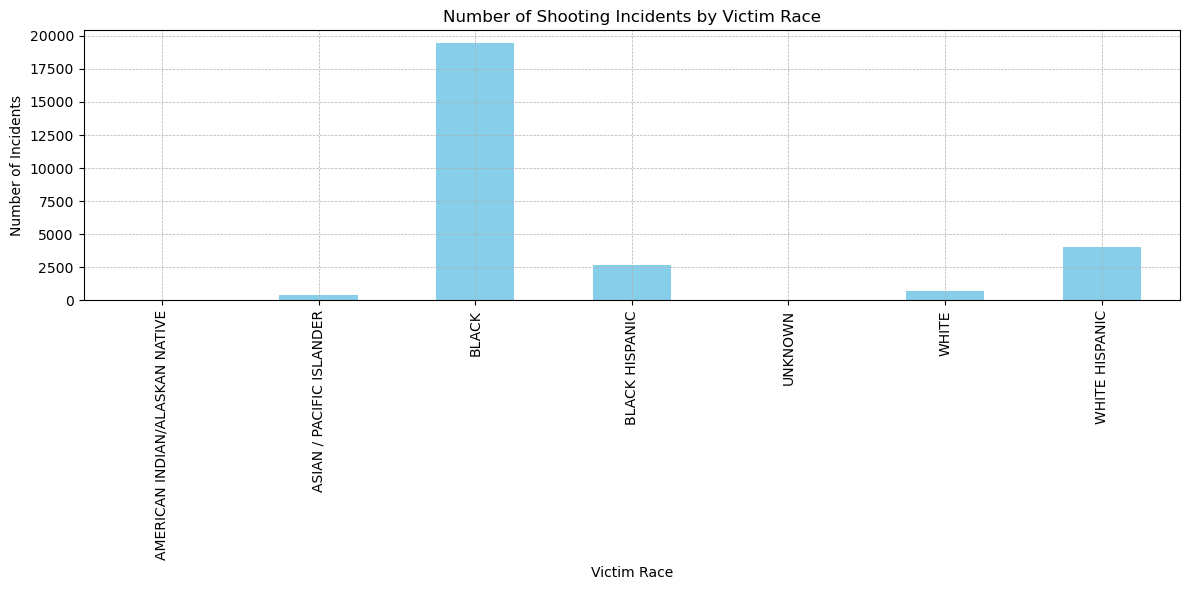

In [14]:
incidents_per_vic_race = data['VIC_RACE'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_vic_race.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents by Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Clean data. Dropped some (null) locations, prep and vic ages. Kept the NaN because it's a lot especially in the LOC_OF_OCCUR_DESC, LOC_CLASSFCTN_DESC, LOCATION_DESC, PERP_RACE. We can drop the for some specific plots but they have the cordinates which is usefull for the map plots

In [15]:
cleaned_data

INCIDENT_KEY OCCUR_DATE  OCCUR_TIME      BORO LOC_OF_OCCUR_DESC  \
0         228798151 2021-05-27          21    QUEENS               NaN   
1         137471050 2014-06-27          17     BRONX               NaN   
2         147998800 2015-11-21           3    QUEENS               NaN   
3         146837977 2015-10-09          18     BRONX               NaN   
4          58921844 2009-02-19          22     BRONX               NaN   
...             ...        ...         ...       ...               ...   
27290     246876579 2022-06-19          20     BRONX            INSIDE   
27295     247880311 2022-07-11           9  BROOKLYN            INSIDE   
27299     239930944 2022-01-31          10  BROOKLYN           OUTSIDE   
27306     245173597 2022-05-16          16     BRONX           OUTSIDE   
27310     246876579 2022-06-19          20     BRONX            INSIDE   

       PRECINCT  JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
0           105                0.0                NaN   
1            40                0.0                NaN   
2           108                0.0                NaN   
3            44                0.0                NaN   
4            47                0.0                NaN   
...         ...                ...                ...   
27290        46                2.0            HOUSING   
27295        69                2.0            HOUSING   
27299        71                0.0           DWELLING   
27306        41                0.0             STREET   
27310        46                2.0            HOUSING   

                   LOCATION_DESC  STATISTICAL_MURDER_FLAG  ... PERP_RACE  \
0                            NaN                    False  ...       NaN   
1                            NaN                    False  ...       NaN   
2                            NaN                     True  ...       NaN   
3                            NaN                    False  ...       NaN   
4                            NaN                     True  ...     BLACK   
...                          ...                      ...  ...       ...   
27290  MULTI DWELL - PUBLIC HOUS                    False  ...     BLACK   
27295  MULTI DWELL - PUBLIC HOUS                    False  ...     BLACK   
27299    MULTI DWELL - APT BUILD                     True  ...     BLACK   
27306          BEAUTY/NAIL SALON                     True  ...     BLACK   
27310  MULTI DWELL - PUBLIC HOUS                    False  ...     BLACK   

      VIC_AGE_GROUP VIC_SEX        VIC_RACE    X_COORD_CD     Y_COORD_CD  \
0             18-24       M           BLACK  1.058925e+06  180924.000000   
1             18-24       M           BLACK  1.005028e+06  234516.000000   
2             25-44       M           WHITE  1.007668e+06  209836.531250   
3               <18       M  WHITE HISPANIC  1.006537e+06  244511.140625   
4             45-64       M           BLACK  1.024922e+06  262189.406250   
...             ...     ...             ...           ...            ...   
27290         25-44       M  WHITE HISPANIC  1.012980e+06  251028.000000   
27295         25-44       M           BLACK  1.012903e+06  177077.000000   
27299         45-64       M           BLACK  9.999550e+05  181228.000000   
27306           <18       F  WHITE HISPANIC  1.012932e+06  238907.000000   
27310         25-44       M  WHITE HISPANIC  1.012980e+06  251028.000000   

        Latitude  Longitude                                        Lon_Lat  \
0      40.662965 -73.730839  POINT (-73.73083868899994 40.662964620000025)   
1      40.810352 -73.924942   POINT (-73.92494232599995 40.81035186300006)   
2      40.742607 -73.915492   POINT (-73.91549174199997 40.74260663300004)   
3      40.837782 -73.919457   POINT (-73.91945661499994 40.83778200300003)   
4      40.886238 -73.852910   POINT (-73.85290950899997 40.88623791800006)   
...          ...        ...                                            ...   
27290  40.855644 -73.896141                   POINT (-73.8961

In [36]:
cleaned_data.to_csv('cleaned_shooting_data.csv', index=False)

Monthly Shooting Incidents in New York
The red line is the 1 of january of every year

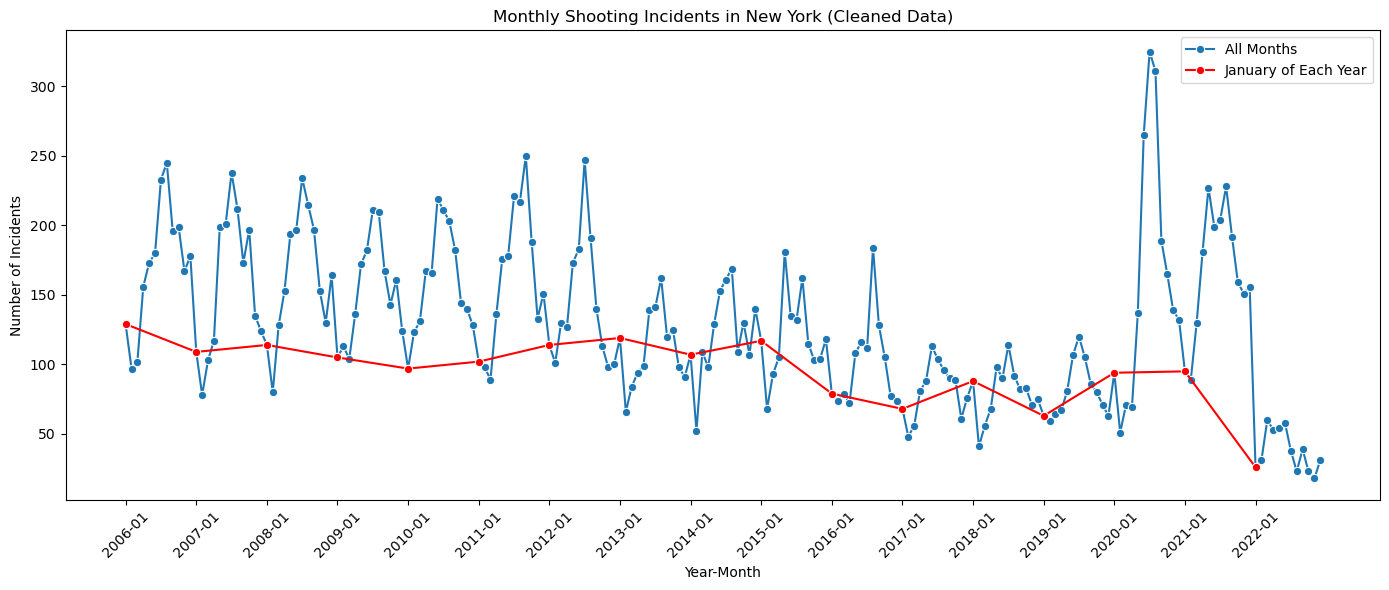

In [18]:
# Convert 'OCCUR_DATE' to datetime
cleaned_data['OCCUR_DATE'] = pd.to_datetime(cleaned_data['OCCUR_DATE'])

# Extract year and month for grouping
cleaned_data['YEAR_MONTH'] = cleaned_data['OCCUR_DATE'].dt.to_period('M')

# Group by new 'YEAR_MONTH' column to count incidents
monthly_incidents = cleaned_data.groupby('YEAR_MONTH').size()
monthly_incidents_filtered = monthly_incidents[monthly_incidents.index.month == 1]

# Plotting the time series of incidents with adjusted x-axis
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_incidents.index.astype(str), y=monthly_incidents.values, marker='o', label='All Months')
sns.lineplot(x=monthly_incidents_filtered.index.astype(str), y=monthly_incidents_filtered.values, marker='o', color='red', label='January of Each Year')
plt.title('Monthly Shooting Incidents in New York (Cleaned Data)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.xticks(monthly_incidents_filtered.index.astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

2020 to 2021 is sus

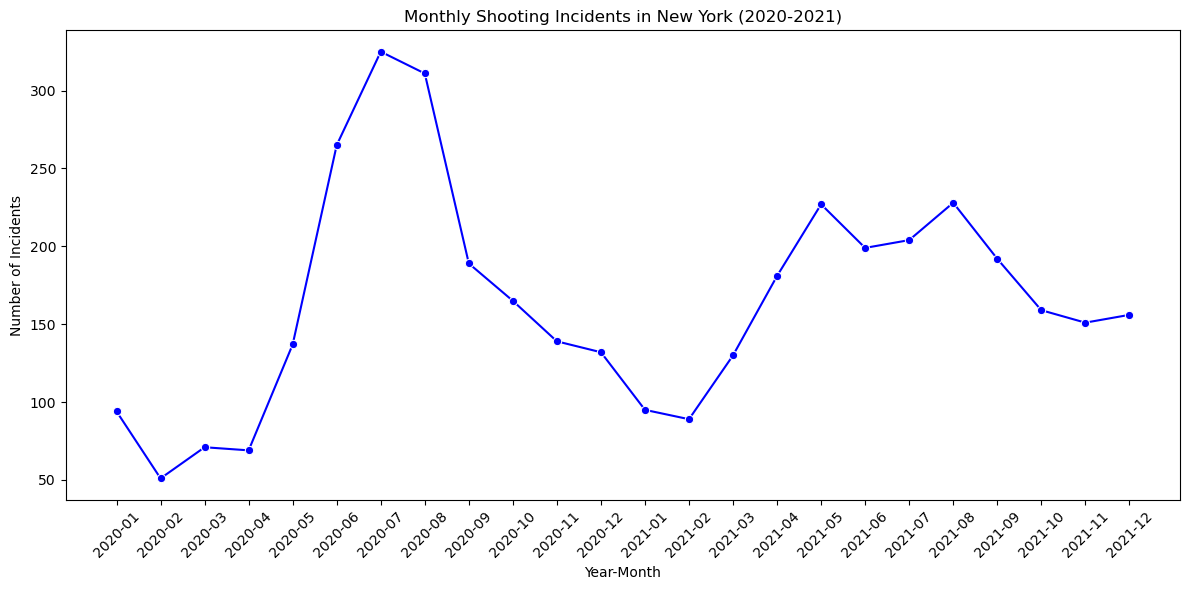

In [19]:
# Filter data for 2020 and 2021
monthly_incidents_2020_2021 = monthly_incidents['2020':'2021']

# Plotting the time series of incidents for 2020-2021
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_incidents_2020_2021.index.astype(str), y=monthly_incidents_2020_2021.values, marker='o', color='blue')
plt.title('Monthly Shooting Incidents in New York (2020-2021)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

https://www.nyc.gov/site/nypd/news/p0106a/overall-crime-new-york-city-reaches-record-low-2020
https://counciloncj.org/impact-report-covid-19-and-crime/

Ok maybe this happend cause of covid. There is some information about it. 
Also, George Floyd killed on May 25, 2020.

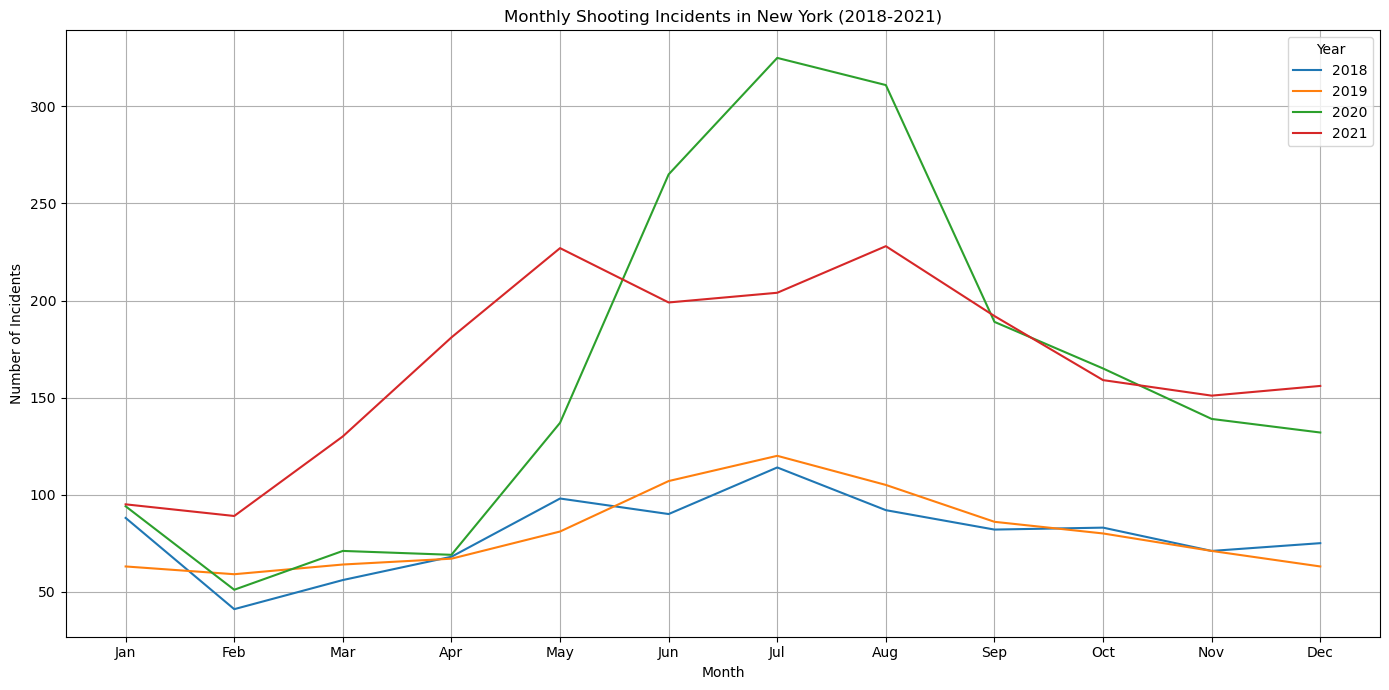

In [20]:
# Create a dataframe for easier plotting by adding a 'Month' and 'Year' column
cleaned_data['Year'] = cleaned_data['OCCUR_DATE'].dt.year
cleaned_data['Month'] = cleaned_data['OCCUR_DATE'].dt.month

# Group by 'Year' and 'Month' and count incidents
year_month_incidents = cleaned_data.groupby(['Year', 'Month']).size().unstack(level=0)

# Selecting only the years 2018 to 2021 for plotting
selected_years = year_month_incidents[[2018, 2019, 2020, 2021]]

# Plotting
plt.figure(figsize=(14, 7))
for year in selected_years.columns:
    sns.lineplot(x=selected_years.index, y=selected_years[year], label=str(year))

plt.title('Monthly Shooting Incidents in New York (2018-2021)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


In [27]:
heatmap_data = cleaned_data.dropna(subset=['Latitude', 'Longitude'])

# Create a new Folium map centered around New York City
map_with_boroughs = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Load and add the GeoJSON file directly to the folium map
geojson_path = 'new-york-city-boroughs-ny_.geojson'  # Update this path
folium.GeoJson(
    geojson_path,
    name='geojson'
).add_to(map_with_boroughs)

# Add the heatmap layer with the shooting data
HeatMap(data=heatmap_data[['Latitude', 'Longitude']].values, radius=10).add_to(map_with_boroughs)

# Save the map to an HTML file or display it directly in Jupyter
map_with_boroughs
# map_with_boroughs.save('NYC_Shooting_Heatmap_with_Boroughs.html')

In [32]:
data_2021 = cleaned_data[cleaned_data['YEAR'] == 2021]

# Create a map centered around New York City
map_2021 = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles='CartoDB positron')

# Add points for each shooting incident in 2021
for idx, row in data_2021.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map_2021)

# Save to HTML
# map_html_path = '/mnt/data/NYC_2021_Shooting_Incidents.html'
# map_2021.save(map_html_path)
map_2021

In [49]:
# Create a list of lists for each year with the format needed for HeatMapWithTime
data_by_year = []
years = sorted(cleaned_data['YEAR'].unique())
for year in years:
    year_data = cleaned_data[cleaned_data['YEAR'] == year][['Latitude', 'Longitude']].dropna()
    data_by_year.append(year_data.values.tolist())

# Initialize the Folium map centered around New York City
map_with_time = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create a HeatMapWithTime
heatmap = HeatMapWithTime(data_by_year, auto_play=True, max_opacity=0.8)
heatmap.add_to(map_with_time)

# Save to HTML
map_html_path = '/mnt/data/NYC_Shooting_HeatMapWithTime.html'
# map_with_time.save(map_html_path)
map_with_time